#### Тестирование осциляторов

In [30]:
import pandas as pd
import pandas_ta as ta
import yfinance as yf
from matplotlib import (
    pyplot as plt,
    animation
)
import mplfinance as mpf

In [ ]:
ticker = "SBERP.ME"
df = yf.download(tickers=ticker,
                 period="1mo",
                 interval="1h",
                 auto_adjust=True)

In [40]:
# df.ta.sma(length=20, append=True)
df.ta.bbands(window=4, window_dev=20, append=True)
df["ema12"] = df["Close"].ewm(span=12, adjust=False).mean()
df["ema26"] = df["Close"].ewm(span=26, adjust=False).mean()
df["macd"] = df["ema12"] - df["ema26"]
df["signal"] = df["macd"].ewm(span=9, adjust=False).mean()
df["histogram"] = df["macd"] - df["signal"]
df

,Open,High,Low,Close,Volume,SMA_20,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0,ema12,ema26,macd,signal,histogram
2021-11-30 16:30:00+03:00,293.109985,293.299988,291.589996,292.549988,0,NaN,NaN,NaN,NaN,NaN,NaN,292.549988,292.549988,0.000000,0.000000,0.000000
2021-11-30 17:30:00+03:00,292.440002,293.100006,290.109985,290.910004,1135180,NaN,NaN,NaN,NaN,NaN,NaN,292.297683,292.428507,-0.130825,-0.026165,-0.104660
2021-11-30 18:30:00+03:00,290.899994,293.420013,290.809998,293.420013,989280,NaN,NaN,NaN,NaN,NaN,NaN,292.470349,292.501952,-0.031604,-0.027253,-0.004351
2021-12-01 09:30:00+03:00,294.709991,300.000000,294.709991,298.209991,1536230,NaN,NaN,NaN,NaN,NaN,NaN,293.353371,292.924770,0.428601,0.063918,0.364683
2021-12-01 10:30:00+03:00,298.089996,300.750000,297.100006,299.450012,1221020,NaN,288.257208,294.908002,301.558796,4.510419,0.841464,294.291316,293.408121,0.883194,0.227773,0.655421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30 13:30:00+03:00,276.989990,277.399994,276.899994,277.140015,359180,277.5405,276.319765,276.806000,277.292234,0.351318,0.843471,277.003331,277.244216,-0.240885,-0.169818,-0.071067
2021-12-30 14:30:00+03:00,277.130005,277.500000,277.000000,277.130005,444000,277.4030,276.450951,276.920001,277.389052,0.338762,0.723860,277.022819,277.235756,-0.212936,-0.178441,-0.034495
2021-12-30 15:30:00+03:00,277.260010,277.970001,276.859985,277.859985,460060,277.3435,276.492131,277.191998,277.891865,0.504969,0.977224,277.151614,277.281995,-0.130381,-0.168829,0.038448
2021-12-30 16:30:00+03:00,277.940002,278.019989,277.299988,277.600006,114440,277.2685,276.671285,277.340002,278.008720,0.482237,0.694405,277.220597,277.305551,-0.084954,-0.152054,0.067100


In [47]:
start_date = "2021-12-01"
lower_b = df.loc[start_date:, ["BBL_5_2.0"]]
upper_b = df.loc[start_date:, ["BBU_5_2.0"]]
ema12 = df.loc[start_date:, ["ema12"]]
ema26 = df.loc[start_date:, ["ema26"]]
histogram = df.loc[start_date:, ["histogram"]]
macd = df.loc[start_date:, ["macd"]]
signal = df.loc[start_date:, ["signal"]]

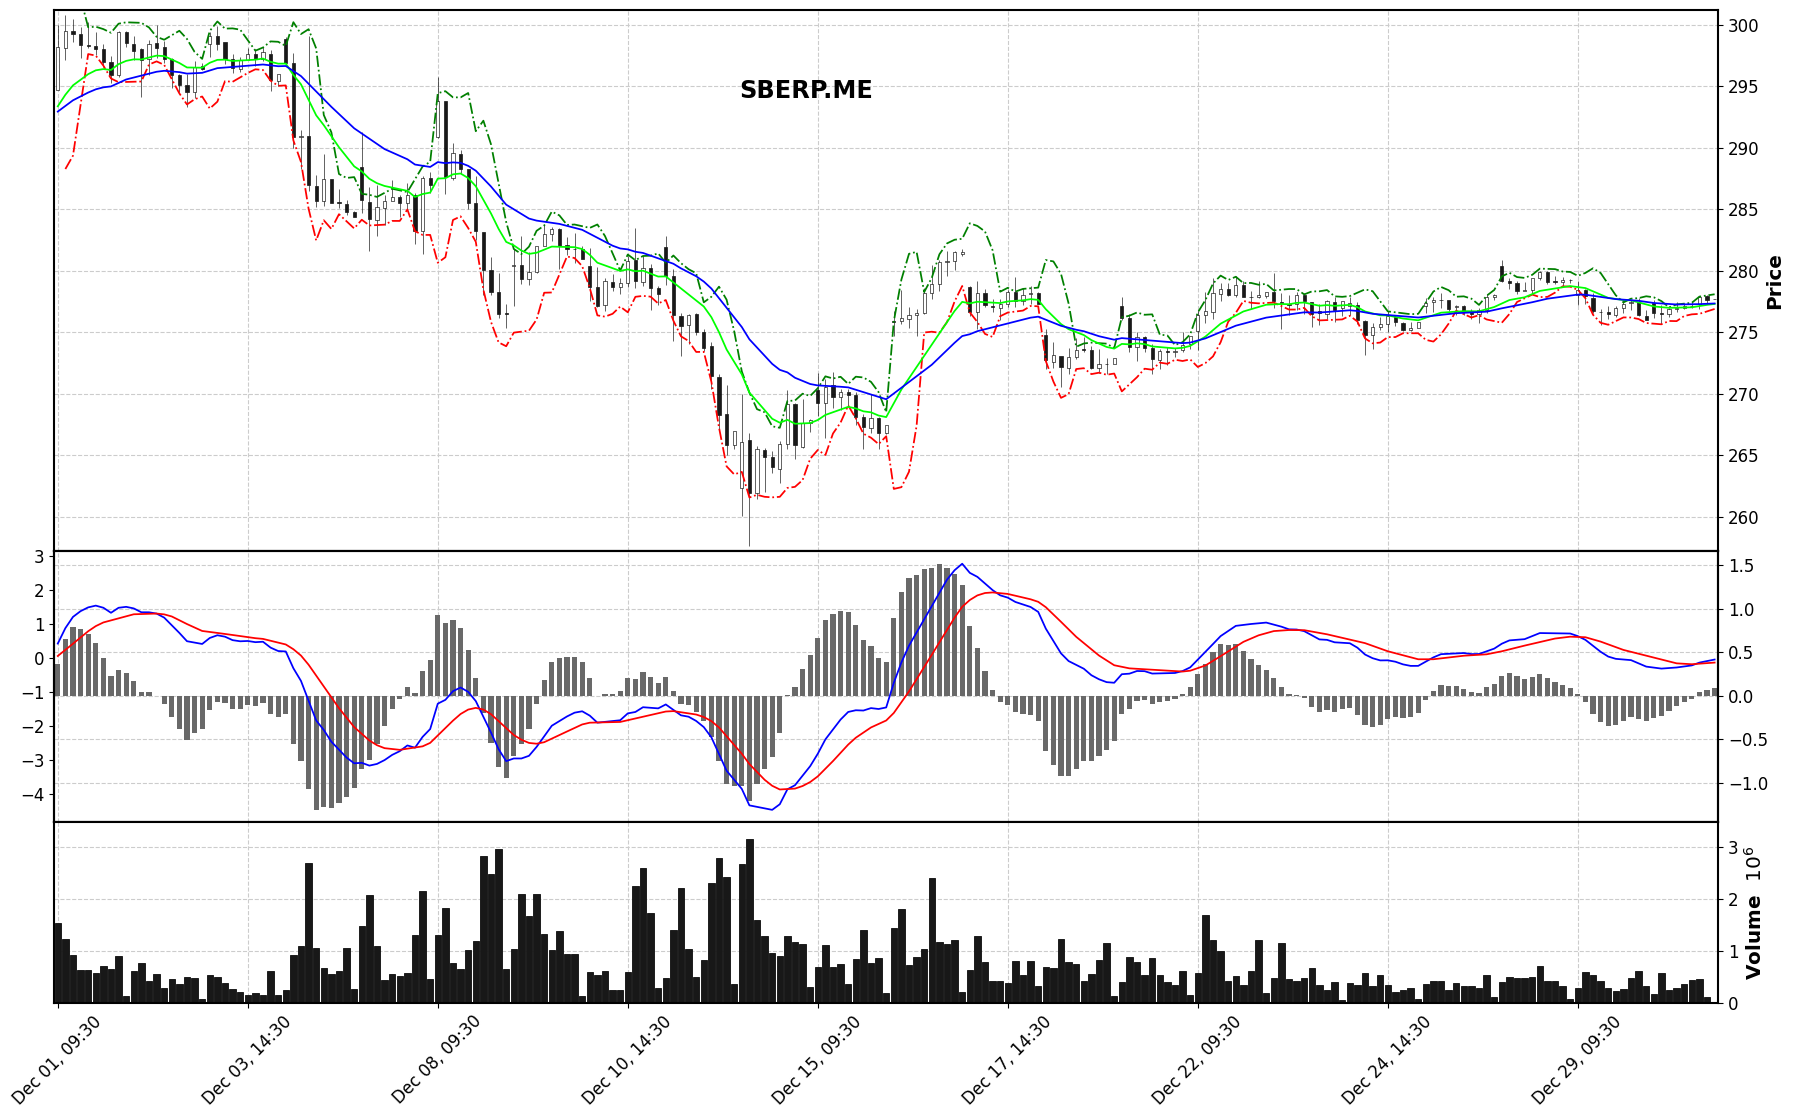

In [48]:
additional_plots = [mpf.make_addplot(upper_b, linestyle='dashdot', color='g'),
                    mpf.make_addplot(lower_b, linestyle='dashdot', color='r'),
                    mpf.make_addplot(ema12, color='lime'),
                    mpf.make_addplot(ema26, color='b'),
                    mpf.make_addplot(histogram, type='bar', width=0.7, panel=1,
                                     color='dimgray', alpha=1, secondary_y=False),
                    mpf.make_addplot(macd, panel=1, color='b', secondary_y=True),
                    mpf.make_addplot(signal, panel=1, color='r', secondary_y=True), ]
mpf.plot(data=df[start_date:],
         type="candle",
         addplot=additional_plots,
         # mav=(10, 20),
         volume=True,
         figscale=2,
         figratio=(10, 6),
         title=ticker,
         tight_layout=True,
         style="classic",
         volume_panel=2,
         panel_ratios=(6, 3, 2))